In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Inisialisasi dataset
df = pd.read_excel('Obesity_Dataset.xlsx')

In [20]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

# Melihat informasi kolom
df.info()

Dimensi data: (1610, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64


In [21]:
# Melihat beberapa data awal
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [8]:
# Deskripsi statistik

df.describe()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1.557764,33.115528,167.741615,1.834783,1.729193,2.063354,1.872050,2.395652,1.69441,2.108696,1.822360,3.265839,2.012422,2.667081,2.678882
std,0.496806,9.835076,7.979873,0.371492,0.444515,0.746043,0.638345,1.010501,0.46080,0.814710,0.382328,1.343035,0.697929,1.518388,0.815855
min,1.000000,18.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,25.000000,161.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,32.000000,168.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,2.000000,41.000000,174.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000
max,2.000000,54.000000,193.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.00000,3.000000,2.000000,5.000000,3.000000,5.000000,4.000000


In [23]:
df.isnull().sum()

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

In [25]:
df['Class'].unique()

array([2, 3, 4, 1], dtype=int64)

In [10]:
df_2 = df.copy()

In [11]:
df_2['Class'] = df_2['Class'].replace({1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'}) 

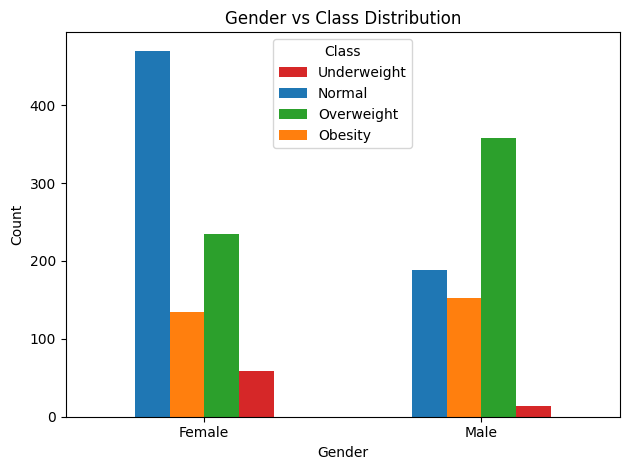

In [23]:
# Membuat tabel crosstab dan plot
sex_class_counts = pd.crosstab(df_2['Sex'], df_2['Class'])
sex_class_counts.plot(kind='bar', stacked=False, title='Gender vs Class Distribution')

# Menambahkan label sumbu
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()


In [13]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df_2['Age Group'] = pd.cut(df_2['Age'], bins=age_bins, labels=age_labels)

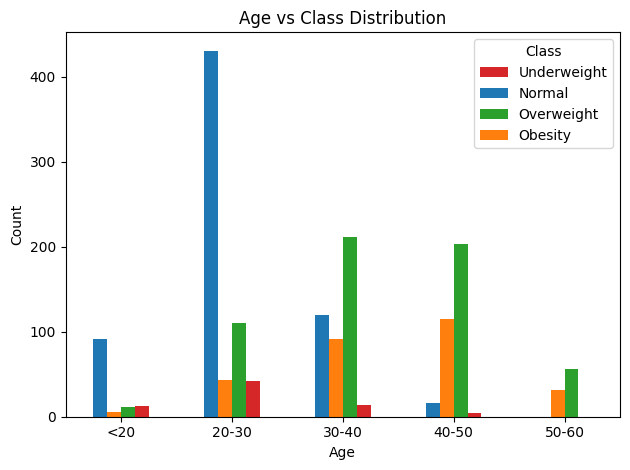

In [26]:
# Age vs class distribution
age_class_counts = pd.crosstab(df_2['Age Group'], df_2['Class'])


age_class_counts.plot(kind='bar', stacked=False)

plt.title('Age vs Class Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

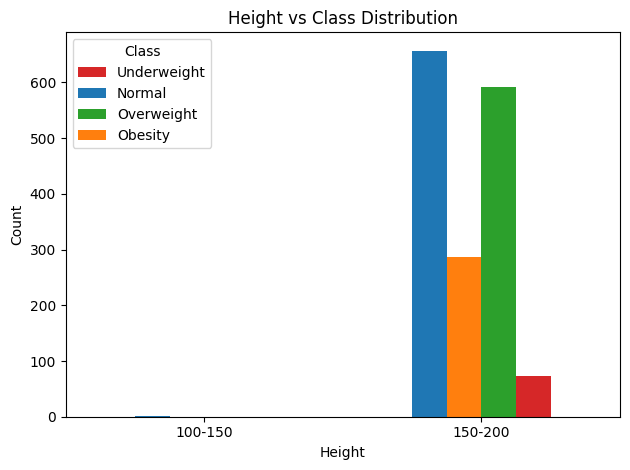

In [29]:
# Height vs class distribution 
ht_bins = [0, 50, 100, 150, 200, 250, 300]
ht_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250+']

df_2['Height Group'] = pd.cut(df_2['Height'], bins=ht_bins, labels=ht_labels)

ht_class_counts = pd.crosstab(df_2['Height Group'], df_2['Class'])


ht_class_counts.plot(kind='bar', stacked=False)

plt.title('Height vs Class Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

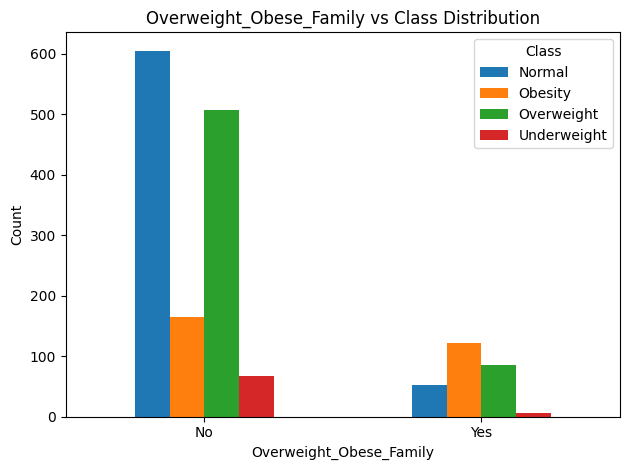

In [ ]:
# overweight obese family
df_2['Overweight_Obese_Family'] = df_2['Overweight_Obese_Family'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Overweight_Obese_Family'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Overweight_Obese_Family vs Class Distribution')
plt.xlabel('Overweight_Obese_Family')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

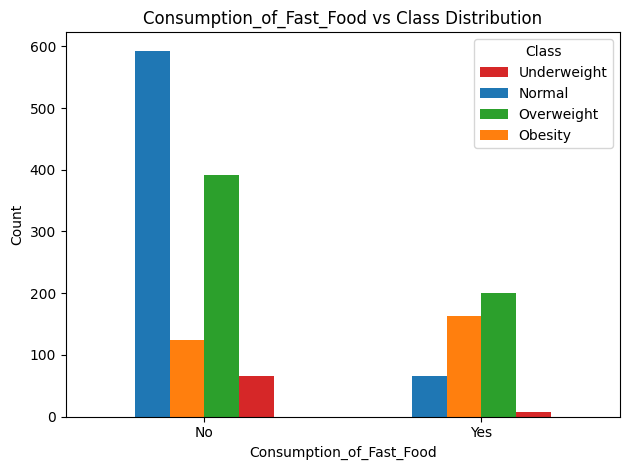

In [30]:
# consumption of fast food
df_2['Consumption_of_Fast_Food'] = df_2['Consumption_of_Fast_Food'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Consumption_of_Fast_Food'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Consumption_of_Fast_Food vs Class Distribution')
plt.xlabel('Consumption_of_Fast_Food')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

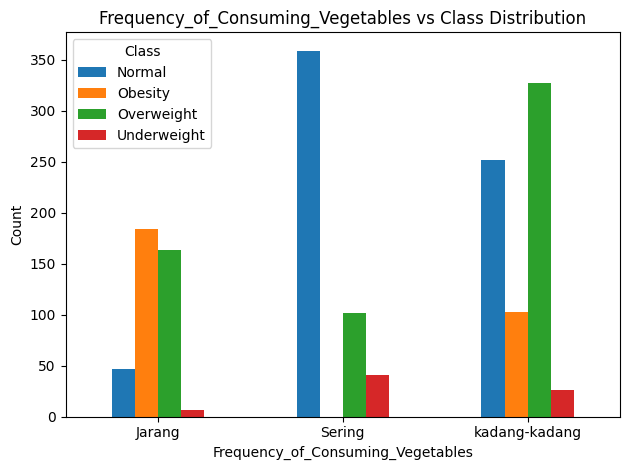

In [ ]:
df_2['Frequency_of_Consuming_Vegetables'] = df_2['Frequency_of_Consuming_Vegetables'].replace({1: 'Rarely', 2: 'Sometimes', 3: 'Always'})
fam_class_counts = pd.crosstab(df_2['Frequency_of_Consuming_Vegetables'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Frequency_of_Consuming_Vegetables vs Class Distribution')
plt.xlabel('Frequency_of_Consuming_Vegetables')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()


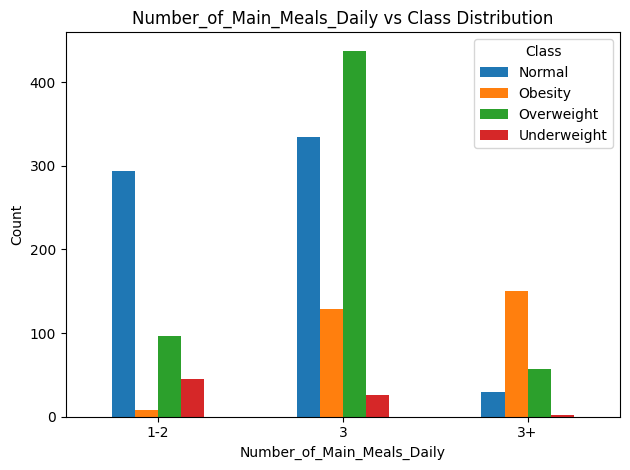

In [ ]:
# jumlah makanan utama setiap hari
df_2['Number_of_Main_Meals_Daily'] = df_2['Number_of_Main_Meals_Daily'].replace({1: '1-2', 2: '3', 3: '3+'})
fam_class_counts = pd.crosstab(df_2['Number_of_Main_Meals_Daily'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Number_of_Main_Meals_Daily vs Class Distribution')
plt.xlabel('Number_of_Main_Meals_Daily')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

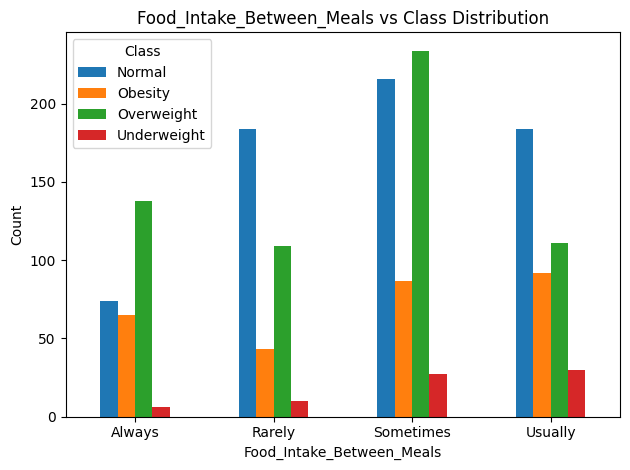

In [ ]:
df_2['Food_Intake_Between_Meals'] = df_2['Food_Intake_Between_Meals'].replace({1: 'Rarely', 2: 'Sometimes', 3: 'Usually', 4:'Always'})
fam_class_counts = pd.crosstab(df_2['Food_Intake_Between_Meals'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Food_Intake_Between_Meals vs Class Distribution')
plt.xlabel('Food_Intake_Between_Meals')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

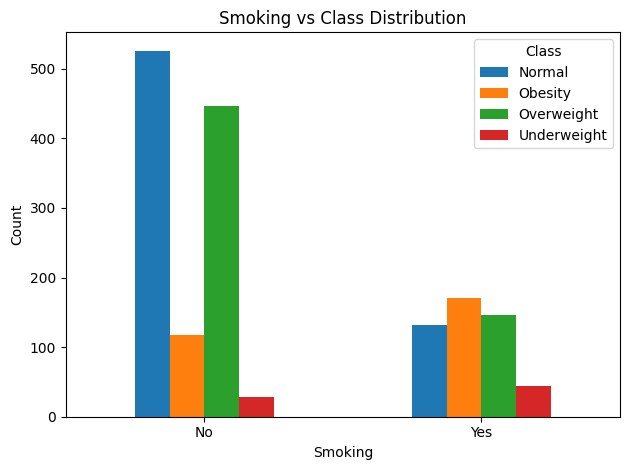

In [ ]:
df_2['Smoking'] = df_2['Smoking'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Smoking'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Smoking vs Class Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()


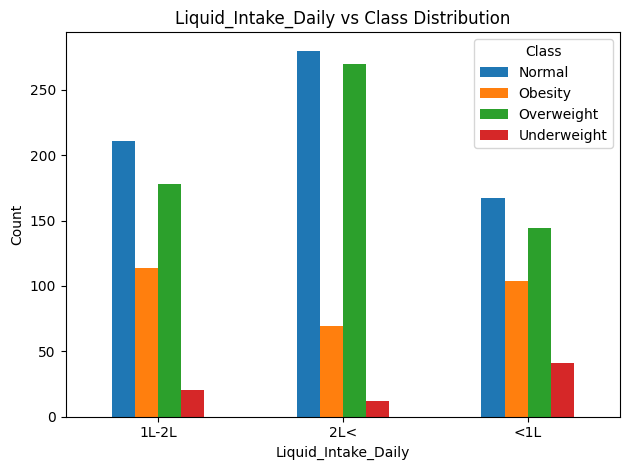

In [ ]:
df_2['Liquid_Intake_Daily'] = df_2['Liquid_Intake_Daily'].replace({1: '<1L', 2: '1L-2L', 3:'2L<'})
fam_class_counts = pd.crosstab(df_2['Liquid_Intake_Daily'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Liquid_Intake_Daily vs Class Distribution')
plt.xlabel('Liquid_Intake_Daily')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

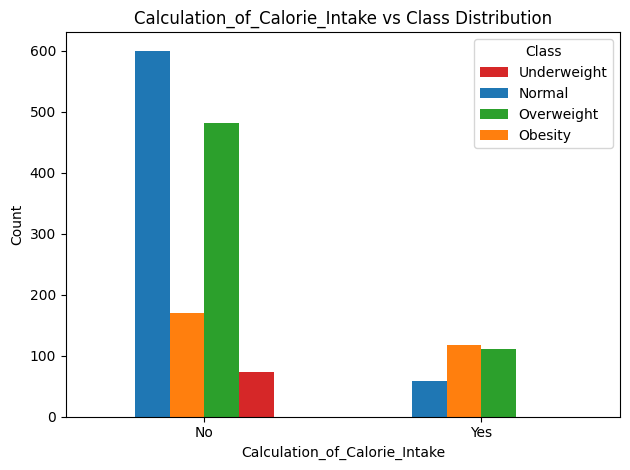

In [34]:
df_2['Calculation_of_Calorie_Intake'] = df_2['Calculation_of_Calorie_Intake'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Calculation_of_Calorie_Intake'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Calculation_of_Calorie_Intake vs Class Distribution')
plt.xlabel('Calculation_of_Calorie_Intake')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

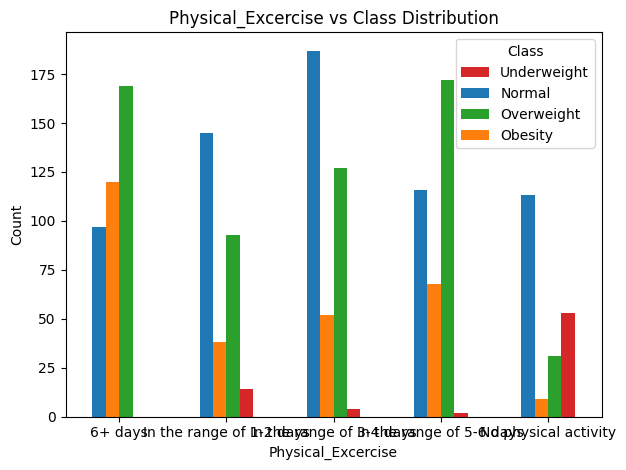

In [60]:
df_2['Physical_Excercise'] = df_2['Physical_Excercise'].replace({1: 'No physical activity', 2: 'In the range of 1-2 days', 3: 'In the range of 3-4 days', 4:'In the range of 5-6 days', 5:'6+ days'})
fam_class_counts = pd.crosstab(df_2['Physical_Excercise'], df_2['Class'])

fam_class_counts.plot(kind='bar', stacked=False)


plt.title('Physical_Excercise vs Class Distribution')
plt.xlabel('Physical_Excercise')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()

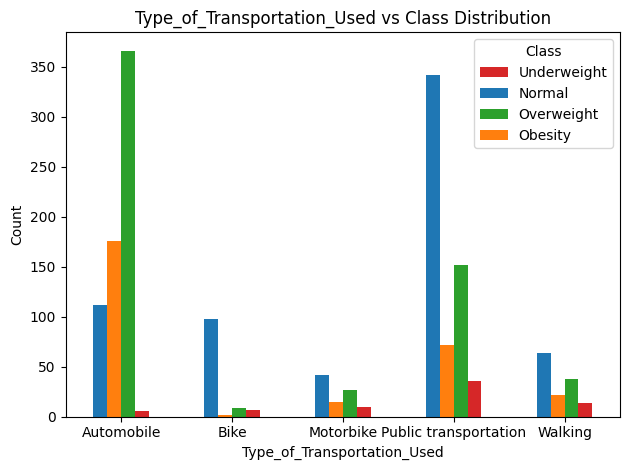

In [62]:
df_2['Type_of_Transportation_Used']= df_2['Type_of_Transportation_Used'].replace({1: 'Automobile', 2: 'Motorbike', 3: 'Bike', 4: 'Public transportation', 5:'Walking'})
fam_class_counts = pd.crosstab(df_2['Type_of_Transportation_Used'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Type_of_Transportation_Used vs Class Distribution')
plt.xlabel('Type_of_Transportation_Used')
plt.ylabel('Count')
plt.xticks(rotation=0)  

# Menyusun legend dalam urutan tertentu
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(c) for c in ['Underweight', 'Normal', 'Overweight', 'Obesity']]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Class')

plt.tight_layout()
plt.show()